<center>
<h1> Programming Assignment-3</h1>
<h3><b>Name:</b> Shatansh Patnaik</h3>
<h3><b>Roll No:</b> 20MA20067</h3>
<h3><b>Course</b>: Visual Computng with AI/ML<h3>
</center>

## Importing the essential libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve

## Question-1: Detecting Diagonal Edges

In [2]:
# Using matplotlib to display the image
def display_image(img, title):
    plt.title(title)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.show()

# Defining the prewitt kernel for edge detection
prewitt_kernel = np.array([[ 0,  1,  2],
                           [-1,  0,  1],
                           [-2, -1,  0]])

# Implementation of filter function
def my_filter_2d(input_img, kernel):
    m = kernel.shape[0]
    n = kernel.shape[1]

    # Perform padding before convolution
    input_img = cv2.copyMakeBorder(input_img, 1, 1, 1, 1, cv2.BORDER_CONSTANT, value=0)

    rows = input_img.shape[0] - m + 1
    cols = input_img.shape[1] - n + 1
    
    filtered_img = np.zeros((rows, cols))

    # Perform convolution
    for i in range(rows):
        for j in range(cols):
            region_of_interest = (np.sum(input_img[i:i + m, j:j + n] * kernel))

            if region_of_interest < 0:
                filtered_img[i][j] = 0
            elif region_of_interest > 255:
                filtered_img[i][j] = 255
            else:
                filtered_img[i][j] = region_of_interest
    
    return filtered_img

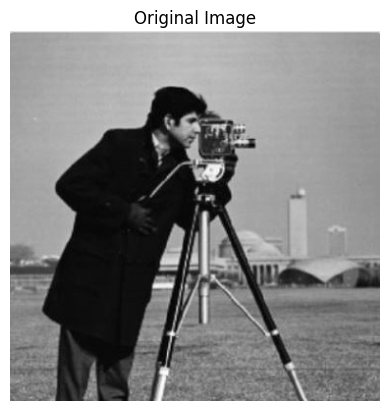

In [3]:
# Import the image
assign_2_image_1 = cv2.imread('Assignment_2_Image_1.png', cv2.IMREAD_GRAYSCALE)
display_image(assign_2_image_1, 'Original Image')

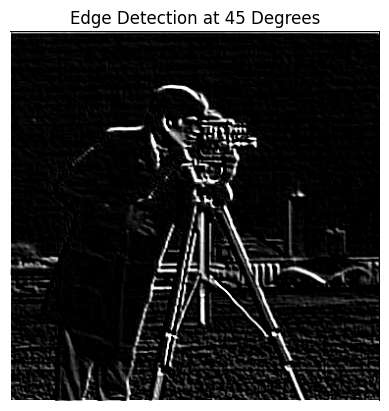

In [4]:
# Filter the image using the Prewitt Kernel
filtered_img = my_filter_2d(assign_2_image_1, prewitt_kernel)
display_image(filtered_img, 'Edge Detection at 45 Degrees')

## Question-2: Edge Detection

In [5]:
# define the Laplacian Filter as mentioned in the problem statement
laplacian_kernel = np.array([
    [-1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1],
    [-1, -1, 24, -1, -1],
    [-1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1]
])

# Define Laplacian of Gaussian (LoG) kernel
log_kernel = np.array([[ 0,  0, -1,  0,  0],
                       [ 0, -1, -2, -1,  0],
                       [-1, -2, 16, -2, -1],
                       [ 0, -1, -2, -1,  0],
                       [ 0,  0, -1,  0,  0]])


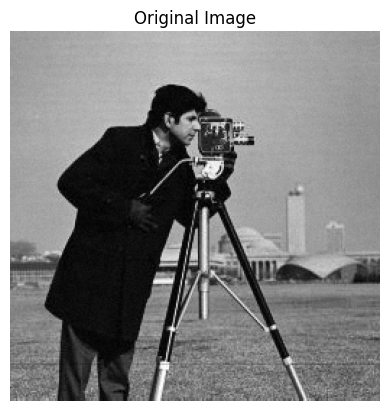

In [6]:
# Import the image
assign_2_image_2 = cv2.imread('Assignment_2_Image_2.png', cv2.IMREAD_GRAYSCALE)
display_image(assign_2_image_2, 'Original Image')

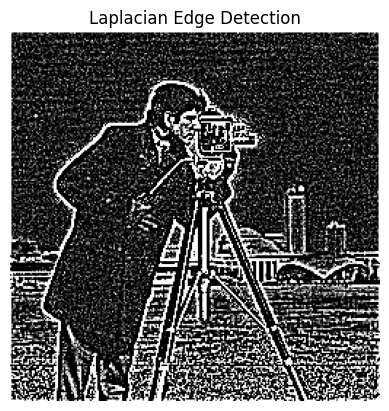

In [7]:
# Apply the Laplacian FIlter for edge detection
laplacian_edge_image = my_filter_2d(assign_2_image_2, laplacian_kernel)
display_image(laplacian_edge_image, 'Laplacian Edge Detection')

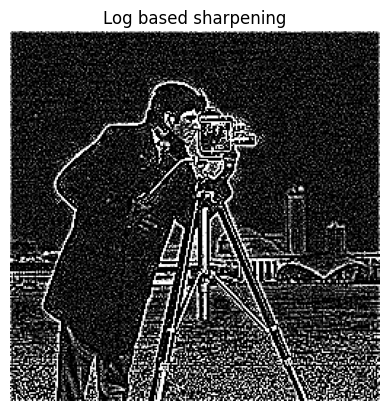

In [8]:
# Apply the Log based filter for image sharpening
log_image = my_filter_2d(assign_2_image_2, log_kernel)

# sharpened_img = assign_2_image_2 + log_image

display_image(log_image, 'Log based sharpening')

## Explanation of the difference
- The pure Laplacian kernel tends to highlight edges aggressively, leading to a potentially noisier result as observed in the image previously.
- The LoG kernel provides a smoother and more controlled sharpening, with less amplification of noise, making it more suitable for various image enhancement tasks.

## Question-3: Sharpening Using Smoothing

In [9]:
# Function to obtain the Gaussian Kernel
def get_gaussian_kernel(kernel_size, sigma):
    kernel = np.zeros((kernel_size, kernel_size))
        
    for x in range(-1, 2):
        for y in range(-1, 2):
            kernel[x+1, y+1] = (1/(2*np.pi*sigma**2)) * np.exp(-(x**2 + y**2) / (2*sigma**2))

    kernel /= np.sum(kernel)
    
    return kernel

def add_weighted(img1, weight1, img2, weight2, scalar):
    assert img1.shape == img2.shape, "Images must have the same dimensions."
    
    result = (img1 * weight1) + (img2 * weight2) + scalar
    result = np.clip(result, 0, 255)
    result = result.astype(np.uint8)
    
    return result

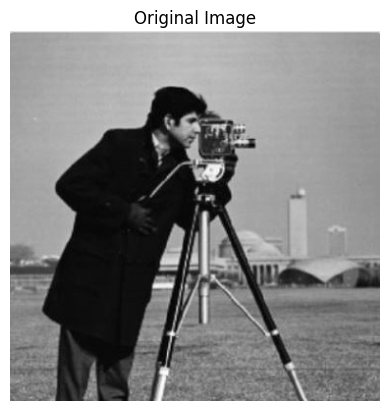

In [10]:
assign_2_image_3 = cv2.imread('Assignment_2_Image_1.png', cv2.IMREAD_GRAYSCALE)
display_image(assign_2_image_3, 'Original Image')

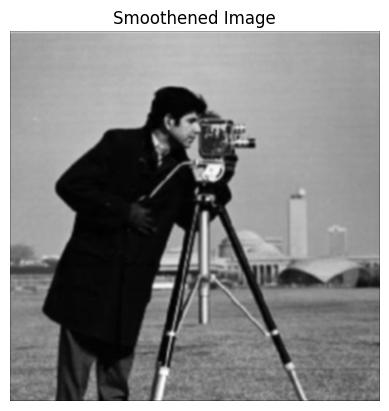

In [11]:
gaussian_kernel = get_gaussian_kernel(3, 1)
smoothened_img = my_filter_2d(assign_2_image_3, gaussian_kernel)
display_image(smoothened_img, 'Smoothened Image')

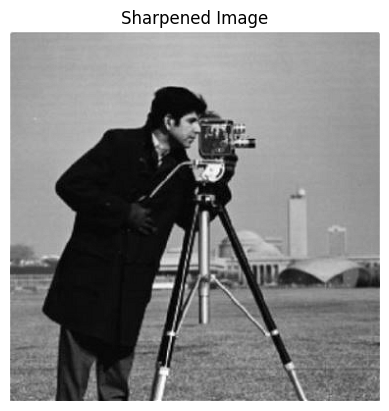

In [12]:
mask = assign_2_image_3 - smoothened_img
sharpened_img = add_weighted(assign_2_image_3, 1.5, smoothened_img, -0.5, 0)
display_image(sharpened_img, 'Sharpened Image')

## Question-4: Gabor Filtering

In [13]:
# Defining the Garbor Filter
def gabor_kernel(size, sigma, theta, lam, gamma, psi):
    y, x = np.meshgrid(np.arange(-size // 2 + 1, size // 2 + 1), np.arange(-size // 2 + 1, size // 2 + 1))
    
    x_nought = x * np.cos(theta) + y * np.sin(theta)
    y_nought = -x * np.sin(theta) + y * np.cos(theta)
    
    gb_filter = np.exp(-0.5 * (x_nought**2 / sigma**2 + gamma**2 * y_nought**2 / sigma**2)) * np.cos(2 * np.pi * x_nought / lam + psi)
    
    return gb_filter

# Obtain filtered images
def get_filtered_images(image, kernel_size, sigma_values, gamma, theta_values, f_0, psi):
    filtered_images_sigma_1 = []
    filtered_images_sigma_3 = []
    
    for sigma in sigma_values:
        filtered_images = []
        for theta in theta_values:
            lam = 1 / f_0
            gabor = gabor_kernel(kernel_size, sigma, theta, lam, gamma, psi)
            
            filtered_image = my_filter_2d(image, gabor)
            filtered_images.append(filtered_image)
        
        max_filtered_image = np.max(filtered_images, axis=0)
        
        if sigma == 1.0:
            filtered_images_sigma_1 = (filtered_images, max_filtered_image)
        else:
            filtered_images_sigma_3 = (filtered_images, max_filtered_image)

    return filtered_images_sigma_1, filtered_images_sigma_3

# Display a list of images
def display_images(image_list, theta_values, main_title):
    plt.figure(figsize=(12, 8))

    for i, (theta, image) in enumerate(zip(theta_values, image_list[0])):
        plt.subplot(3, 4, i + 1)
        plt.imshow(image, cmap='gray')
        plt.title(f'Sigma=1.0, Theta={int(np.degrees(theta))}°')
        plt.axis('off')
    
    plt.subplot(3, 4, 5)
    plt.imshow(image_list[1], cmap='gray')
    plt.axis('off')
    plt.title(main_title)

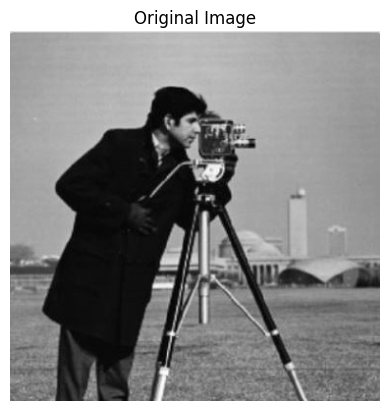

In [14]:
# Displaying the image
assign_2_image = cv2.imread('Assignment_2_Image_1.png', cv2.IMREAD_GRAYSCALE)
display_image(assign_2_image, 'Original Image')

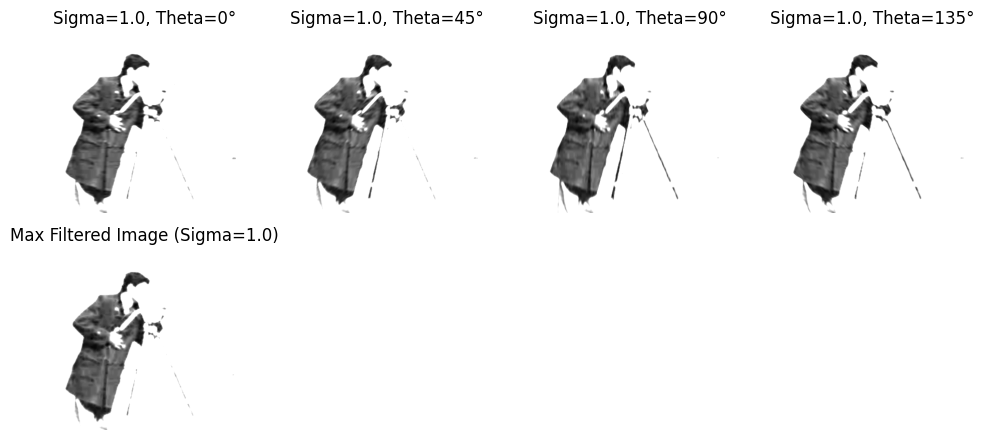

In [15]:
# Defining the Parameters
kernel_size = 31
sigma_values = [1.0, 3.0]
gamma = 0.5
theta_values = [0, np.pi/4, np.pi/2, 3*np.pi/4]
f_0 = 0.1
psi = 0

filtered_images_sigma_1, filtered_images_sigma_3 = get_filtered_images(assign_2_image, kernel_size, sigma_values, gamma, theta_values, f_0, psi)
display_images(filtered_images_sigma_1, theta_values, 'Max Filtered Image (Sigma=1.0)')

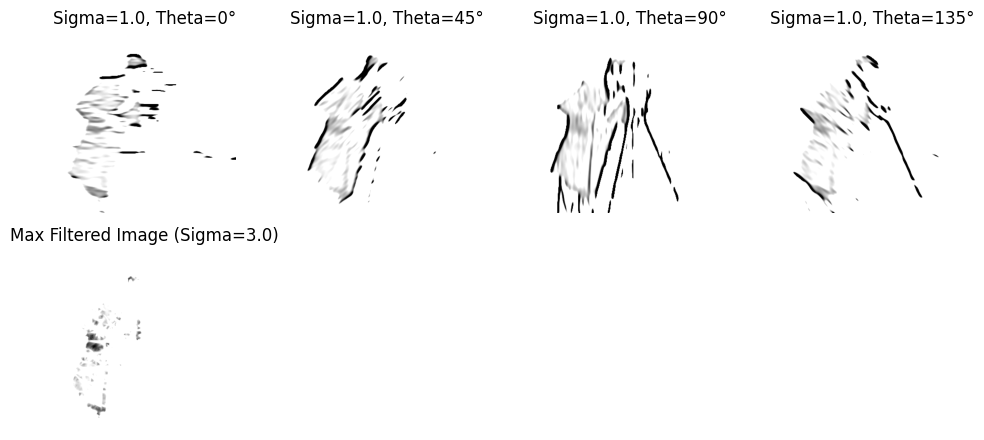

In [16]:
display_images(filtered_images_sigma_3, theta_values, 'Max Filtered Image (Sigma=3.0)')

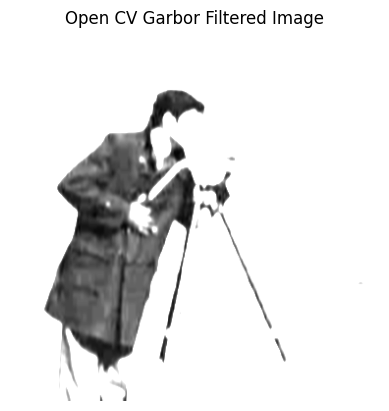

In [17]:
gabor_cv = cv2.getGaborKernel((kernel_size, kernel_size), 1.0, 0, 10.0, 0.5, 0, ktype=cv2.CV_32F)
filtered_cv = cv2.filter2D(assign_2_image, cv2.CV_8UC3, gabor_cv)

display_image(filtered_cv, 'Open CV Garbor Filtered Image')